In [1]:
# Harbinger Package
# version 1.0.737

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger-examples/main/jupyter.R")

#loading Harbinger
load_library("daltoolbox") 
load_library("harbinger") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger



In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 1 
dataset <- har_examples[[5]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,0.00,FALSE
2,0.25,FALSE
3,0.50,FALSE
4,0.75,FALSE
5,1.00,FALSE
6,1.25,FALSE


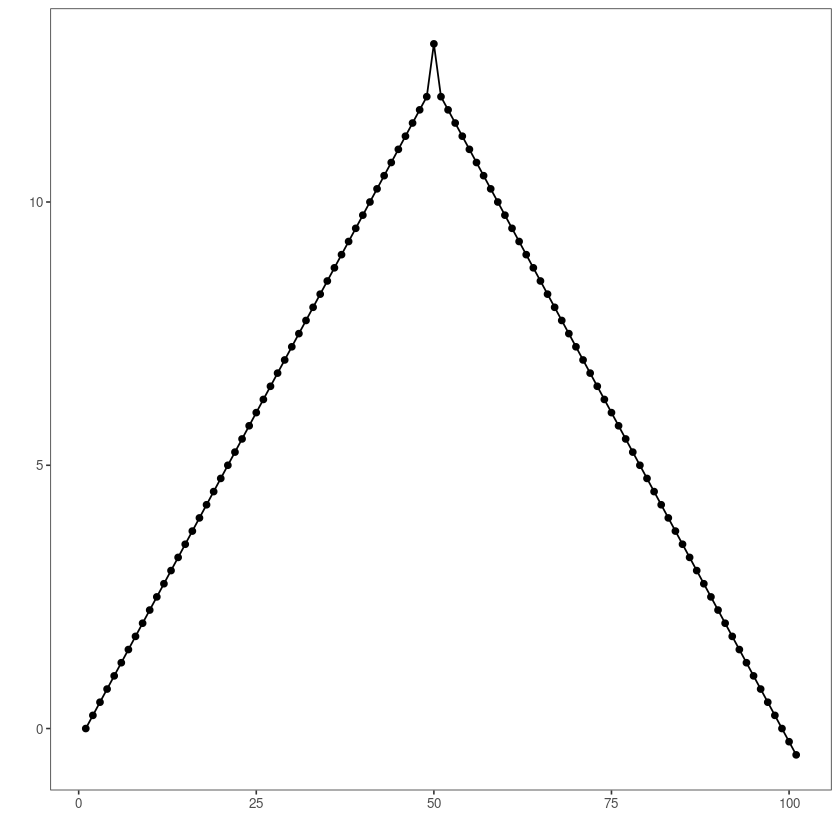

In [4]:
#ploting serie #1
plot_ts(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing change point method 
  model <- hcp_amoc()

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using hanr_fbiad
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event        type
1  84  TRUE changepoint


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     1    
FALSE     1     99   


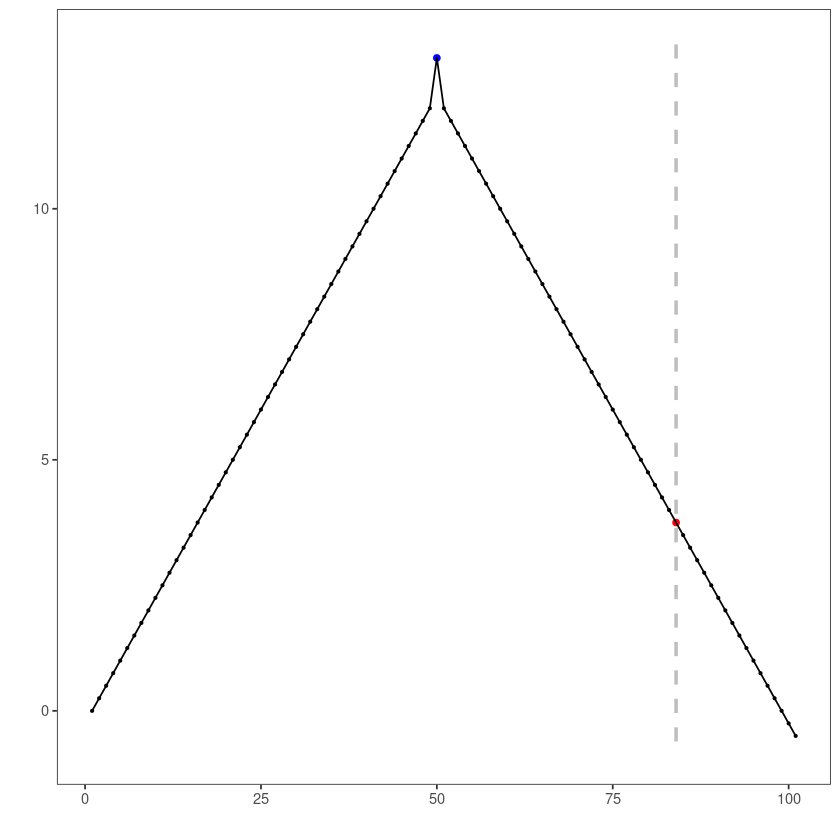

In [10]:
# ploting the results
  grf <- har_plot(model, dataset$serie, detection, dataset$event)
  plot(grf)